# Multiple Linear Regression 
## Bike Sharing Assignment

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_data = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_data dataframe

In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no any missing value in bike_data

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Extract year and month from column dteday

In [8]:
bike_data['dteday'] =  pd.to_datetime(bike_data['dteday'],format='%d-%m-%Y')
bike_data['year'] = pd.DatetimeIndex(bike_data['dteday']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['dteday']).month

In [9]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [10]:
# drop columns yr and mnth and other redundant columns
bike_data.drop(['yr','mnth'],axis=1,inplace=True)
bike_data.drop(['holiday','dteday','instant','casual','registered'],axis=1,inplace=True)
bike_data.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [11]:
# rename some columns
bike_data.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike_data.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


## Step 2: Visualising the Data


In [12]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

#### Season

1: Spring
2: Summer 
3: Fall
4: Winter

In [13]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_data['season'] = bike_data['season'].map(codes)

In [14]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


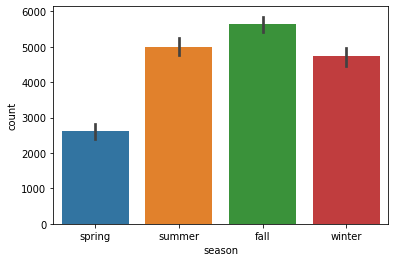

In [15]:
sns.barplot('season','count',data=bike_data)
plt.show()

Bike Rentals are more during the Fall season.

#### weathersit

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_data['weathersit'] = bike_data['weathersit'].map(codes)

In [17]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


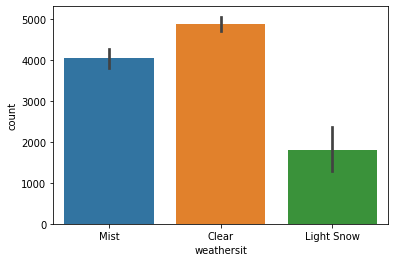

In [18]:
sns.barplot('weathersit','count',data=bike_data)
plt.show()

Bike rental is more in weather Clear, Few clouds, Partly cloudy, Partly cloudy

#### Workingday

if day is neither weekend nor holiday is 1, otherwise is 0

In [19]:
codes = {1:'working_day',0:'Holiday'}
bike_data['workingday'] = bike_data['workingday'].map(codes)

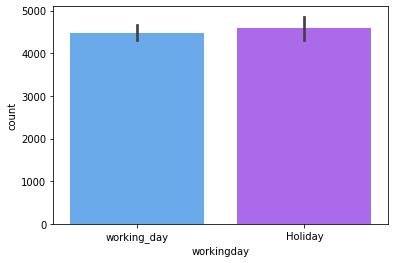

In [20]:
sns.barplot('workingday','count',data=bike_data,palette='cool')
plt.show()

Bikes are rented more on Holiday

#### Year

2018:0,
2019:1

In [21]:
codes = {2019:1,2018:0}
bike_data['year'] = bike_data['year'].map(codes)

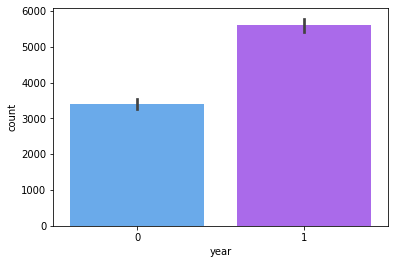

In [22]:
sns.barplot('year','count',data=bike_data,palette='cool')
plt.show()

Bike rental has increased in 2019

####  Month (1 to 12)

In [23]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_data['month'] = bike_data['month'].map(codes)

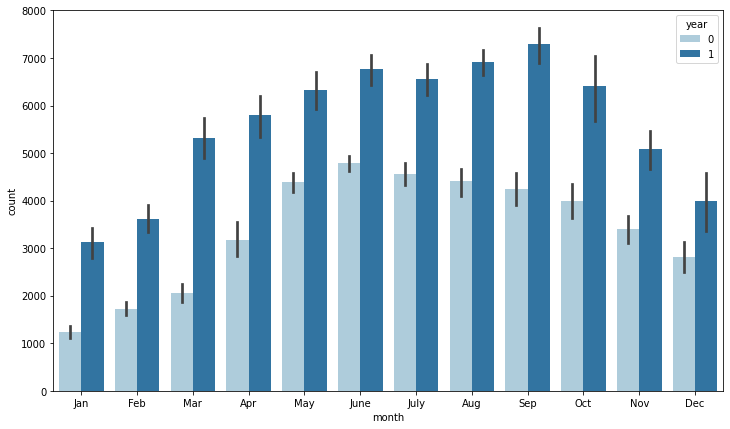

In [24]:
plt.figure(figsize=(12,7))
sns.barplot('month','count',hue='year',data=bike_data,palette='Paired')
plt.show()

For 2018, Bike rental is more in June, whereas for 2019, bike rental is more in september

#### Weekday 

0:Mon ,
1:Tue ,
2:Wed ,
3:Thu ,
4:Fri ,
5:Sat ,
6:Sun 

In [25]:
codes = {0: 'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_data['weekday'] = bike_data['weekday'].map(codes)

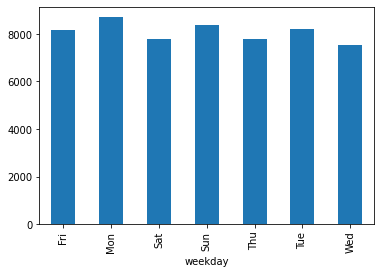

In [26]:
bike_data.groupby('weekday')['count'].max().plot(kind='bar')
plt.show()

Bike rental is more on sunday and monday

#### Temp

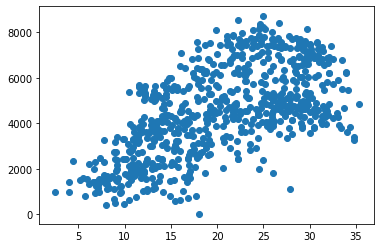

In [27]:
plt.scatter('temp','count',data=bike_data)
plt.show()

Bike rentals can be seen more at higher temperature.

#### atemp

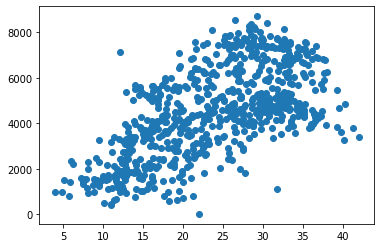

In [28]:
plt.scatter('atemp','count',data=bike_data)
plt.show()

Bike Rentals are observed at higher "feel-like" temperatures

#### Humidity

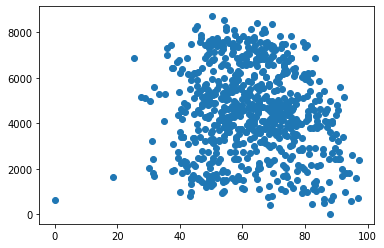

In [29]:
plt.scatter('humidity','count',data=bike_data)
plt.show()

Temperature is directly proportional to Humidity, Bike Rentals are making during high humidity.

#### Windspeed

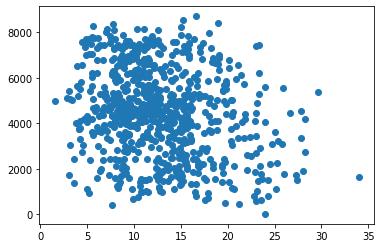

In [30]:
plt.scatter('windspeed','count',data=bike_data)
plt.show()

Wind speeds increase with a greater temperature difference.
Wind speed near the surface is most highly correlated with the temperature

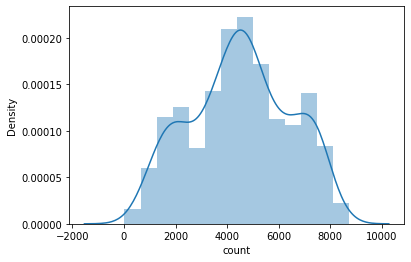

In [31]:
sns.distplot(bike_data['count'])
plt.show()

#### Visualising relationship among variables

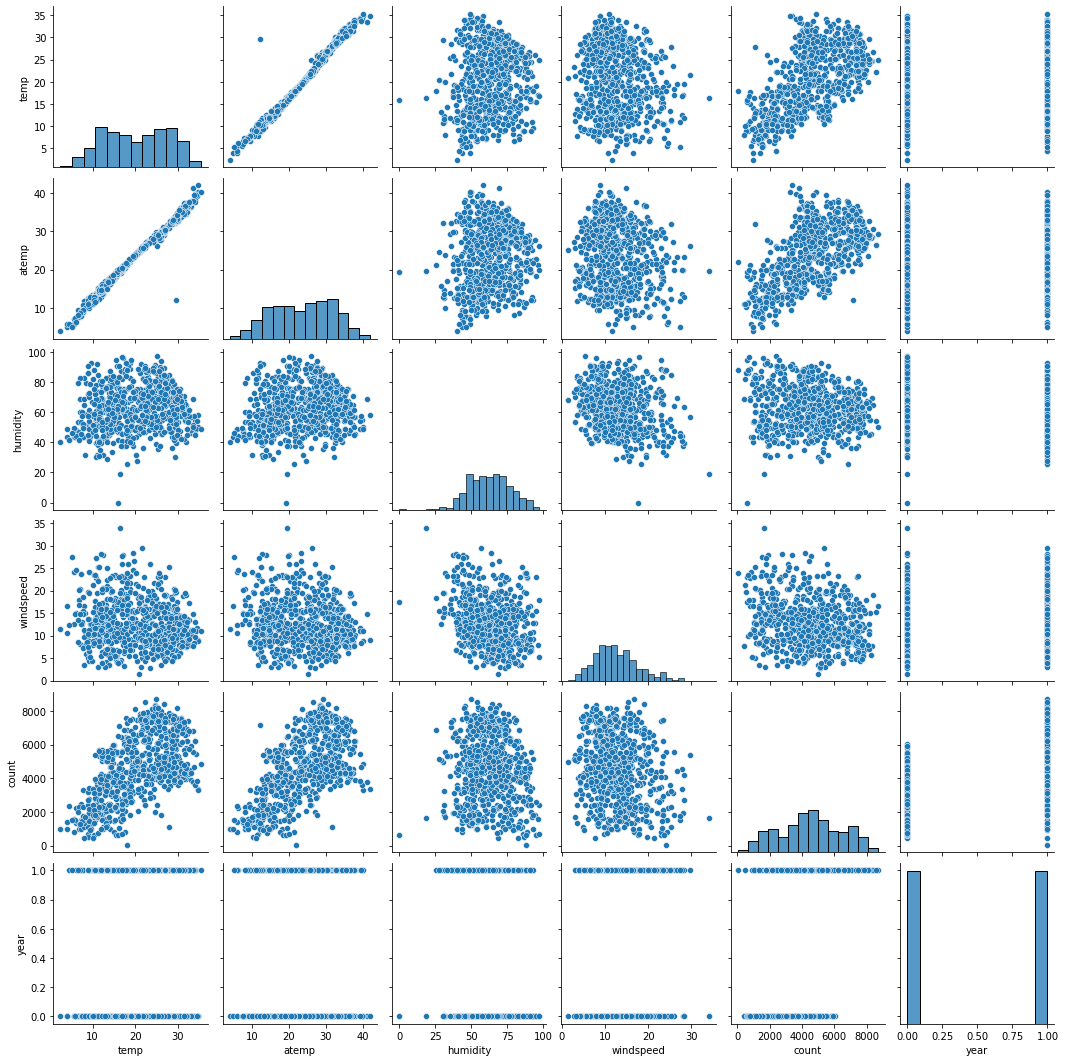

In [32]:
sns.pairplot(bike_data)
plt.show()

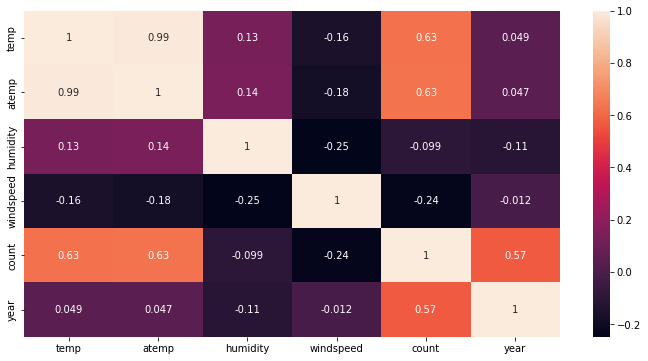

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

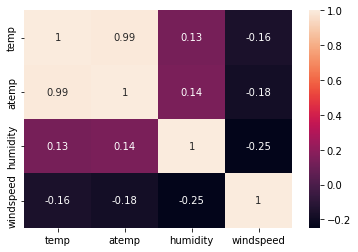

In [34]:
# heat map for selected variables
data= bike_data[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)
plt.show()

atemp and temp are highly correlated. To avoid multicollinearity one should be dropped.

In [35]:
bike_data.drop('atemp',axis=1,inplace=True)
bike_data.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


#### Dealing with Categorical Variables

In [36]:
# Dummy Variables
seasons = pd.get_dummies(bike_data['season'],drop_first=True)

working_day = pd.get_dummies(bike_data['workingday'],drop_first=True)

weather= pd.get_dummies(bike_data['weathersit'],drop_first=True)

month= pd.get_dummies(bike_data['month'],drop_first=True)

week_day= pd.get_dummies(bike_data['weekday'],drop_first=True)

In [37]:
bike_data= pd.concat([bike_data,seasons,working_day,weather,month,week_day],axis=1)

In [38]:
bike_data.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


## Step 3: Data Preparation

In [39]:
# Dropping the categorical variables 

bike_data.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)
bike_data.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
bike_train.shape

(510, 28)

In [42]:
bike_test.shape

(219, 28)

### Rescaling the Features 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [44]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

bike_train[num_vars]= scaler.fit_transform(bike_train[num_vars])

In [45]:
bike_train.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,-0.121335,-0.514725,-0.117752,1.562685,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
576,1.231731,0.516433,-0.330615,1.399629,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,-0.420478,-0.069854,-0.385694,-0.215554,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
728,-1.294913,-1.045032,2.018143,-1.379511,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
bike_train.describe()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-2.757054e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.507843,0.243137,0.245098,0.24902,0.711765,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.500429,0.429398,0.430568,0.43287,0.453386,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284
min,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


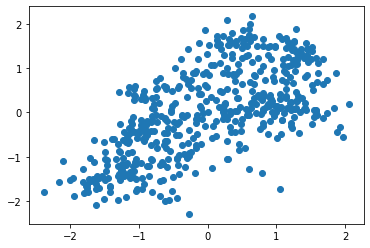

In [47]:
plt.scatter('temp','count',data=bike_train)
plt.show()

### Dividing into X and Y sets for the model building

In [48]:
y_train = bike_train.pop('count')
X_train = bike_train

## Step 5: Building a linear model

Using Recursive feature elimination(RFE) for automated Feature Selection 

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [51]:
# Creating X_test dataframe with RFE selected variables

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

In [52]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
# Print a summary of the linear regression model obtained
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.16e-176
Time:                        17:36:38   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      

In [54]:
#Dropping Mon as it is insignificant.
X_train1= X_train_rfe.drop('Mon',1)

In [55]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [56]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.73e-175
Time:                        17:36:38   Log-Likelihood:                -297.49
No. Observations:                 510   AIC:                             615.0
Df Residuals:                     500   BIC:                             657.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1902      0.059     -3.212      0.001      -0.307      -0.074
temp            0.4042      0.028     14.673      0.000       0.350       0.458
year            1.0463      0.039     26.730      0.000       0.969       1.123
spring         -0.6842      0.058    -11.865      0.000      -0.797      -0.571
working_day    -0.0278      0.054     -0.514      0.607      -0.134       0.078
Light Snow     -1.2901      0.117    -11.047      0.000      -1.519      -1.061
Mist           -0.3544      0.042     -8.490      0.000      -0.436      -0.272
July           -0.3052      0.083     -3.698      0.000      -0.467      -0.143
Sep             0.2731      0.075      3.662      0.000       0.127       0.420
Sun             0.0459      0.073      0.630      0.529      -0.097       0.189
==============================================================================
Omnibus:                       60.871   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.020
Skew:                          -0.641   Prob(JB):                     3.94e-31
Kurtosis:                       5.224   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_new= X_train2.drop('const',axis=1)

### Checking VIF

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.14
0,temp,2.01
2,spring,2.00
1,year,1.81
5,Mist,1.44
6,July,1.35
8,Sun,1.24
7,Sep,1.16
4,Light Snow,1.06


All the variables have VIF less than 5.

## Step 7: Residual Analysis of the train data


In [60]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

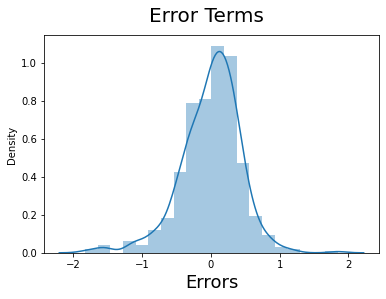

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Error terms are normally spaced

## Step 8: Making Predictions Using the Final Model


#### Applying the scaling on the test sets

In [62]:
num_vars=['temp','humidity','windspeed','count']

bike_test[num_vars]= scaler.transform(bike_test[num_vars])

In [63]:
bike_test.describe()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.096083,-0.081388,-0.043731,0.031073,0.479452,0.255708,0.264840,0.232877,0.639269,0.027397,...,0.086758,0.073059,0.082192,0.086758,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288
std,1.035793,1.022197,0.942916,0.973536,0.500722,0.437258,0.442259,0.423633,0.481313,0.163612,...,0.282125,0.260830,0.275286,0.282125,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520
min,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [64]:
y_test = bike_test.pop('count')
X_test = bike_test

In [65]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'Predictions')

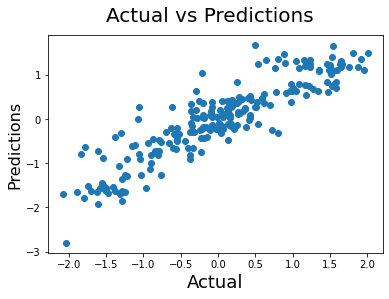

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8035305530955212

## Conclusion

1. The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

Spring season : -0.6842

Temperature : 0.4042 

Mist : -0.3544

July : -0.3052 

Sept : 0.2731

2. Temperature could be prime factor to take decisions

3. Demand for bikes was more in 2019 than 2018

4. Working days have more influence on bike rental, providing offers for working individuals can help.
